In [48]:
import torch
import torchvision
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import matplotlib.image as mimage

In [49]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [50]:
# hyper params

num_epochs = 5
batch_size = 4
learning_rate = 0.001


In [51]:
# dataset has PILImage images of range [0, 1]. 
# We transform them to Tensors of normalized range [-1, 1]

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

In [52]:
# CIFAR10: 60000 32x32 color images in 10 classes, with 6000 images per class
train_dataset = torchvision.datasets.CIFAR10(root='./data/CIFAR10/', train=True,
                                        download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data/CIFAR10/', train=False,
                                       download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [53]:
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [54]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [55]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

# plt.imshow(images[0], cmap='rgb')

In [56]:
# image = Image.open('cnn.jpg')
# image.show()

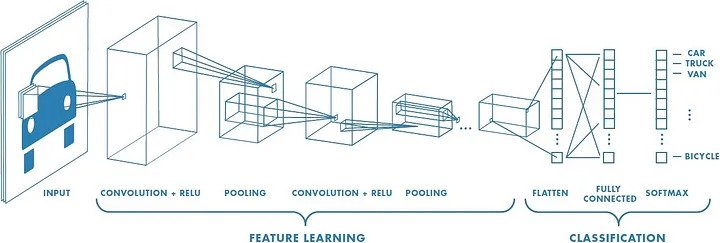

In [57]:
from IPython import display
display.Image('cnn2.jpg', width=700, height=1400)


In [58]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.fc1 = nn.Linear(in_features=16*5*5, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=84)
        self.fc3 = nn.Linear(in_features=84, out_features=10)
    def forward(self, x):
        # n, 3, 32, 32
        out = self.conv1(x)
        out = self.relu(out)
        out = self.pool(out) # => n, 6, 14, 14

        out = self.conv2(out)
        out = self.relu(out)
        out = self.pool(out) # => n, 16, 5, 5

        out = torch.view(-1, 16*5*5)

        out = self.relu(self.fc1(out))
        out = self.relu(self.fc2(out))
        out = self.fc3(out)

        return out



In [59]:
# device = torch.device('cuda')
model = ConvNet().to(device)

RuntimeError: CUDA error: all CUDA-capable devices are busy or unavailable
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.